## Homework 04 

**David Clapp**

**DSCI 35600 - Machine Learning**

**Due Friday, 2/14**

## Description of Assignment

In this problem, you will be asked to create a linear regression model for the purposes of predicting the fuel efficiency of a vehicle based on certain characteristics of the vehicle. 

## Load Packages

In the cell below, please load `numpy`, `pandas`, and the `pyplot` module of `matplotlib`. Import each of these items using their typical aliases. Also import the `LinearRegression` class and the `train_test_split` function from `sklearn`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset

The data for this assignment is stored in the tab-separated file `auto_mpg.txt`. Use `pandas` to load this into a DataFrame called `df`. Use the `head` method to display the first 10 rows of this DataFrame. 

In [2]:
df = pd.read_csv('auto_mpg.txt', sep='\t')
df.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


This DataFrame contains information about 398 models of cars manufactured in the 70s and early 80s. For each model, we have the following 5 pieces of information:

* `mpg` - Fuel efficiency in miles per gallon.
* `cyl` - Number of cylinders in the engine (3, 4, 5, 6, or 8).
* `wt` - Weight of the vehicle in pounds.
* `region` - Region where the vehicle was manufactured. (USA, Europe, or Asia)
* `model` - Name of the vehicle model.

We will be using `mpg` as the target variable in our model, and `cyl`, `wt`, and `region` will be used as features. Note that even though `cyl` can be intepreted numerically, it will make more sense to think of it as a categorical feature. 

## Preprocessing: Creating Feature and Label Arrays

In the cell below, create three arrays `X_num`, `X_cat`, and `y` by selecting columns of the DataFrame `df` as follows:
* `X_num` should be a 2D array that contains a single column storing the numerical feature `wt`. 
* `X_cat` should be a 2D array that contains the categorical features `cyl` and `region`. 
* `y` should be a 1D array that contains the `mpg` for each observation. 

Print the shape of each of these arrays. 

In [3]:
X_num = df.iloc[:, [2]].values
X_cat = df.iloc[:, [1, 3]].values
y = df.iloc[:, 0].values
print(X_num.shape)
print(X_cat.shape)
print(y.shape)

(398, 1)
(398, 2)
(398,)


## Preprocessing: Applying Log Transformation to the Label

The cell below creates two scatter plots: One of MPG plotted against the weight of the vehicle, and one of the natural log of MPG plotted against the weight of the vehicle. Run this cell as-is.

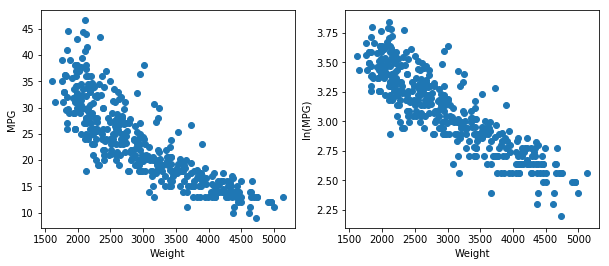

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,2], y)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.subplot(1,2,2)
plt.scatter(df.iloc[:,2], np.log(y))
plt.xlabel('Weight')
plt.ylabel('ln(MPG)')
plt.show()

The relationship in the plot on the right appears to be more linear than the plot on the left. As a result, we will use `ln(MPG)` as our target variable rather than `MPG`. Use the `np.log()` method to take the natural logarithm of `y`. Store the results in a variable called `lny`. 

In [5]:
lny = np.log(y)

## Preprocessing: Encoding Categorical Variables

In the cell below, import `OneHotEncoder` from the appropriate `sklearn` module.

In [6]:
from sklearn.preprocessing import OneHotEncoder

Create an encoder object, and then use that object to create an array containing a one-hot encoding of the categorical features. Called this encoded array `X_enc`. Print the shape of `X_enc`.  

In [7]:
enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(X_cat)

Print the first 10 rows of `X_enc`. To check your work, you might want to compare this output with the first two rows of `df`, which you printed above. 

In [8]:
print(X_enc[:10])

[[0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]]


When encoding a categorical variable, we need one less dummy variable than there are categories for the variable. As a result, the array `X_enc` has two more columns than we need. We will drop columns 0 and 5 from our array. These correspond to `cyl = 3` and `region = asia`. We will thus take these categories to be the base levels for their respective variables.

Run the code in the cell below to drop these two columns.

In [9]:
X_enc = X_enc[:, [1,2,3,4,6,7]]

## Preprocessing: Merging Feature Arrays

In the cell below, use `np.hstack` to combine the numerical and encoded categorical features into a single array called `X`. Place the numerical feature in the first column, followed by the categorical features. Print the shape of this array. 

In [10]:
X = np.hstack([X_num, X_enc])

## Splitting the Data

Create a 60/20/20 train/validation/test split of the data by completing the two lines of code below. Use `X` as the feature array, and use `lny` for the label array. In each call to `train_test_split`, please set `random_state=1`.

In [11]:
X_train, X_holdout, lny_train, lny_holdout = train_test_split(X, lny, test_size=0.6, random_state=1)
X_val, X_test, lny_val, lny_test = train_test_split(X_holdout, lny_holdout, test_size=0.5, random_state=1)


## Create SLR Model

Begin by creating a simple linear regression model, named `mod1`. For this model, use only the first column of your feature arrays, which should contain the weight feature. You can select the first column of `X_train` as a 2D array by using the following code: `X_train[:,[0]]`. You can use similar code to extract the first columns from `X_train` and `X_val`. 

After fitting your model, use the score method to print the training and validation r-squared scores. Display your results as follows:

    Training r-Squared:   0.7620105853956016
    Validation r-Squared: 0.7789050064813834

If all previous steps have been completed correctly, you should get the output shown above. 

In [12]:
mod1 = LinearRegression()
mod1.fit(X_train[:,[0]], lny_train)

print('Training r-Squared:  ', mod1.score(X_train[:,[0]], lny_train))
print('Validation r-Squared:', mod1.score(X_val[:,[0]], lny_val))

Training r-Squared:   0.7602385960256732
Validation r-Squared: 0.7721059943752973


## Full Model
Now create a linear regression model using the entire set of features. Name the model `mod2`. After fitting your model, use the score method to print the training and validation r-squared scores. Display your results as follows:

    Training r-Squared:   ####
    Validation r-Squared: ####

In [13]:
mod2 = LinearRegression()
mod2.fit(X_train, lny_train)

print('Training r-Squared:  ', mod2.score(X_train, lny_train))
print('Validation r-Squared:', mod2.score(X_val, lny_val))

Training r-Squared:   0.7934772944601012
Validation r-Squared: 0.7640591716135448


## Testing r-Squared

In the cell below, print the testing r-squared value for `mod2`. Display your result as follows:

    Testing r-Squared:  ####

In [14]:
print('Testing r-Squared:   ', mod2.score(X_test, lny_test))

Testing r-Squared:    0.7973792641931348


## Generating Predictions

In the cell below, create a 2D array called `X_new` that contains the encoded features for 4 cars with the following characteristics:

1. 2200 lbs, 3 cylinders, manufactured in Asia.
2. 3200 lbs, 6 cylinders, manufactured in Asia.
3. 2400 lbs, 4 cylinders, manufactured in Europe.
4. 3600 lbs, 8 cylinders, manufactured in USA.

Use the `predict` method of `mod2` to predict the `ln(MPG)` for each of the vehicles. Then use `np.exp` to calculate the predicted `MPG`. Print the `MPG` predicted by the model.

In [15]:
# ENCODED: [weight, 4 cyl, 5 cyl, 6 cyl, 8 cyl, eur, usa]

X_new = np.array([[2200, 0,0,0,0,0,0],
                 [3200, 0,0,1,0,0,0],
                 [2400, 1,0,0,0,1,0],
                 [3600, 0,0,0,1,0,1]])

ln_MPG = mod2.predict(X_new)

MPG = np.exp(ln_MPG)
print(MPG)

[21.08903511 21.25287789 27.66324108 17.22370981]
